In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('../..')
from src.utils import bw_map_data_generator as map_gen
from src.utils import inference as inf
import torch


In [18]:
def plot_results(results):
    fig, ax = plt.subplots(1, 6, figsize=(15, 7))

    ax[0].imshow(
        inf.transform_plan(torch.moveaxis(torch.cat(
            [results['map_design'], results['outputs_vanilla'].paths, results['outputs_vanilla'].histories - results['outputs_vanilla'].paths], dim=1)[0], 0, 2)
                        ))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title(f'A* search')

    ax[1].imshow(
        inf.transform_plan(torch.moveaxis(torch.cat(
            [results['map_design'], results['outputs_w2'].paths, results['outputs_w2'].histories - results['outputs_w2'].paths], dim=1)[0], 0, 2)
                        ))
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title(f'WA* search')

    ax[2].imshow(
        inf.transform_plan(torch.moveaxis(torch.cat(
            [results['map_design'], results['outputs_fw100'].paths, results['outputs_fw100'].histories - results['outputs_fw100'].paths], dim=1)[0], 0, 2)
                        ))
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_title(f'Focal search + PPM')

    ax[3].imshow(
        inf.transform_plan(torch.moveaxis(torch.cat(
            [results['map_design'], results['outputs_cf'].paths, results['outputs_cf'].histories - results['outputs_cf'].paths], dim=1)[0], 0, 2)
                        ))
    ax[3].set_xticks([])
    ax[3].set_yticks([])
    ax[3].set_title(f'WA* search + CF')

    ax[4].imshow(results['pred_f'][0, 0], cmap='gray')
    ax[4].set_xticks([])
    ax[4].set_yticks([])
    ax[4].set_title(f'predicted path')

    ax[5].imshow(results['pred_cf'][0, 0])
    ax[5].set_xticks([])
    ax[5].set_yticks([])
    ax[5].set_title(f'predicted CF')

    plt.tight_layout()
    plt.show()    

In [19]:
def plot_multiple_results(results_list):
    num_results = len(results_list)
    fig, axs = plt.subplots(num_results, 6, figsize=(15, 7 * num_results))

    for i, results in enumerate(results_list):
        axs[i, 0].imshow(
            inf.transform_plan(torch.moveaxis(torch.cat(
                [results['map_design'], results['outputs_vanilla'].paths, results['outputs_vanilla'].histories - results['outputs_vanilla'].paths], dim=1)[0], 0, 2)
                            ))
        axs[i, 0].set_xticks([])
        axs[i, 0].set_yticks([])
        axs[i, 0].set_title(f'A* search')

        axs[i, 1].imshow(
            inf.transform_plan(torch.moveaxis(torch.cat(
                [results['map_design'], results['outputs_w2'].paths, results['outputs_w2'].histories - results['outputs_w2'].paths], dim=1)[0], 0, 2)
                            ))
        axs[i, 1].set_xticks([])
        axs[i, 1].set_yticks([])
        axs[i, 1].set_title(f'WA* search')

        axs[i, 2].imshow(
            inf.transform_plan(torch.moveaxis(torch.cat(
                [results['map_design'], results['outputs_fw100'].paths, results['outputs_fw100'].histories - results['outputs_fw100'].paths], dim=1)[0], 0, 2)
                            ))
        axs[i, 2].set_xticks([])
        axs[i, 2].set_yticks([])
        axs[i, 2].set_title(f'Focal search + PPM')

        axs[i, 3].imshow(
            inf.transform_plan(torch.moveaxis(torch.cat(
                [results['map_design'], results['outputs_cf'].paths, results['outputs_cf'].histories - results['outputs_cf'].paths], dim=1)[0], 0, 2)
                            ))
        axs[i, 3].set_xticks([])
        axs[i, 3].set_yticks([])
        axs[i, 3].set_title(f'WA* search + CF')

        axs[i, 4].imshow(results['pred_f'][0, 0], cmap='gray')
        axs[i, 4].set_xticks([])
        axs[i, 4].set_yticks([])
        axs[i, 4].set_title(f'predicted path')

        axs[i, 5].imshow(results['pred_cf'][0, 0])
        axs[i, 5].set_xticks([])
        axs[i, 5].set_yticks([])
        axs[i, 5].set_title(f'predicted CF')

    plt.tight_layout()
    plt.show()

(0, 255)
(0, 32)
Image resized!
Image created successfully!
Image created successfully!


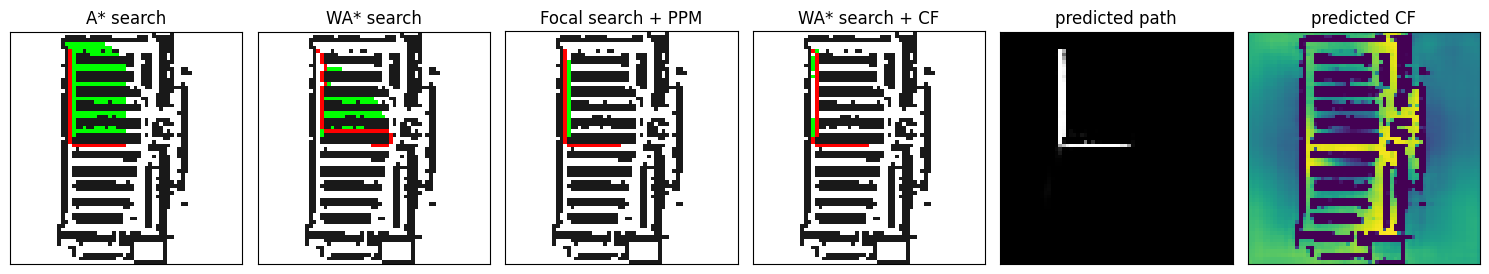

In [20]:
## Plot Results for single start/goal

# create resized image from map
image_path = '0311_map.png'
target_size_x = 64
target_size_y = 64
map_gen.resize_and_pad(
    image_path = image_path, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

# create start image
start_filename = 'start_map'
start_point_x = 16
start_point_y = 5
map_gen.create_start_or_goal_image(
    x_point = start_point_x, 
    y_point = start_point_y, 
    filename = start_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

# create goal image
goal_filename = 'goal_map'
goal_point_x = 31
goal_point_y = 31
map_gen.create_start_or_goal_image(
    x_point = goal_point_x, 
    y_point = goal_point_y, 
    filename = goal_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

results = inf.infer_path()
plot_results(results)

(0, 255)
(0, 32)
Image resized!
Image created successfully!
Image created successfully!
Image created successfully!
Image created successfully!
Image created successfully!
Image created successfully!


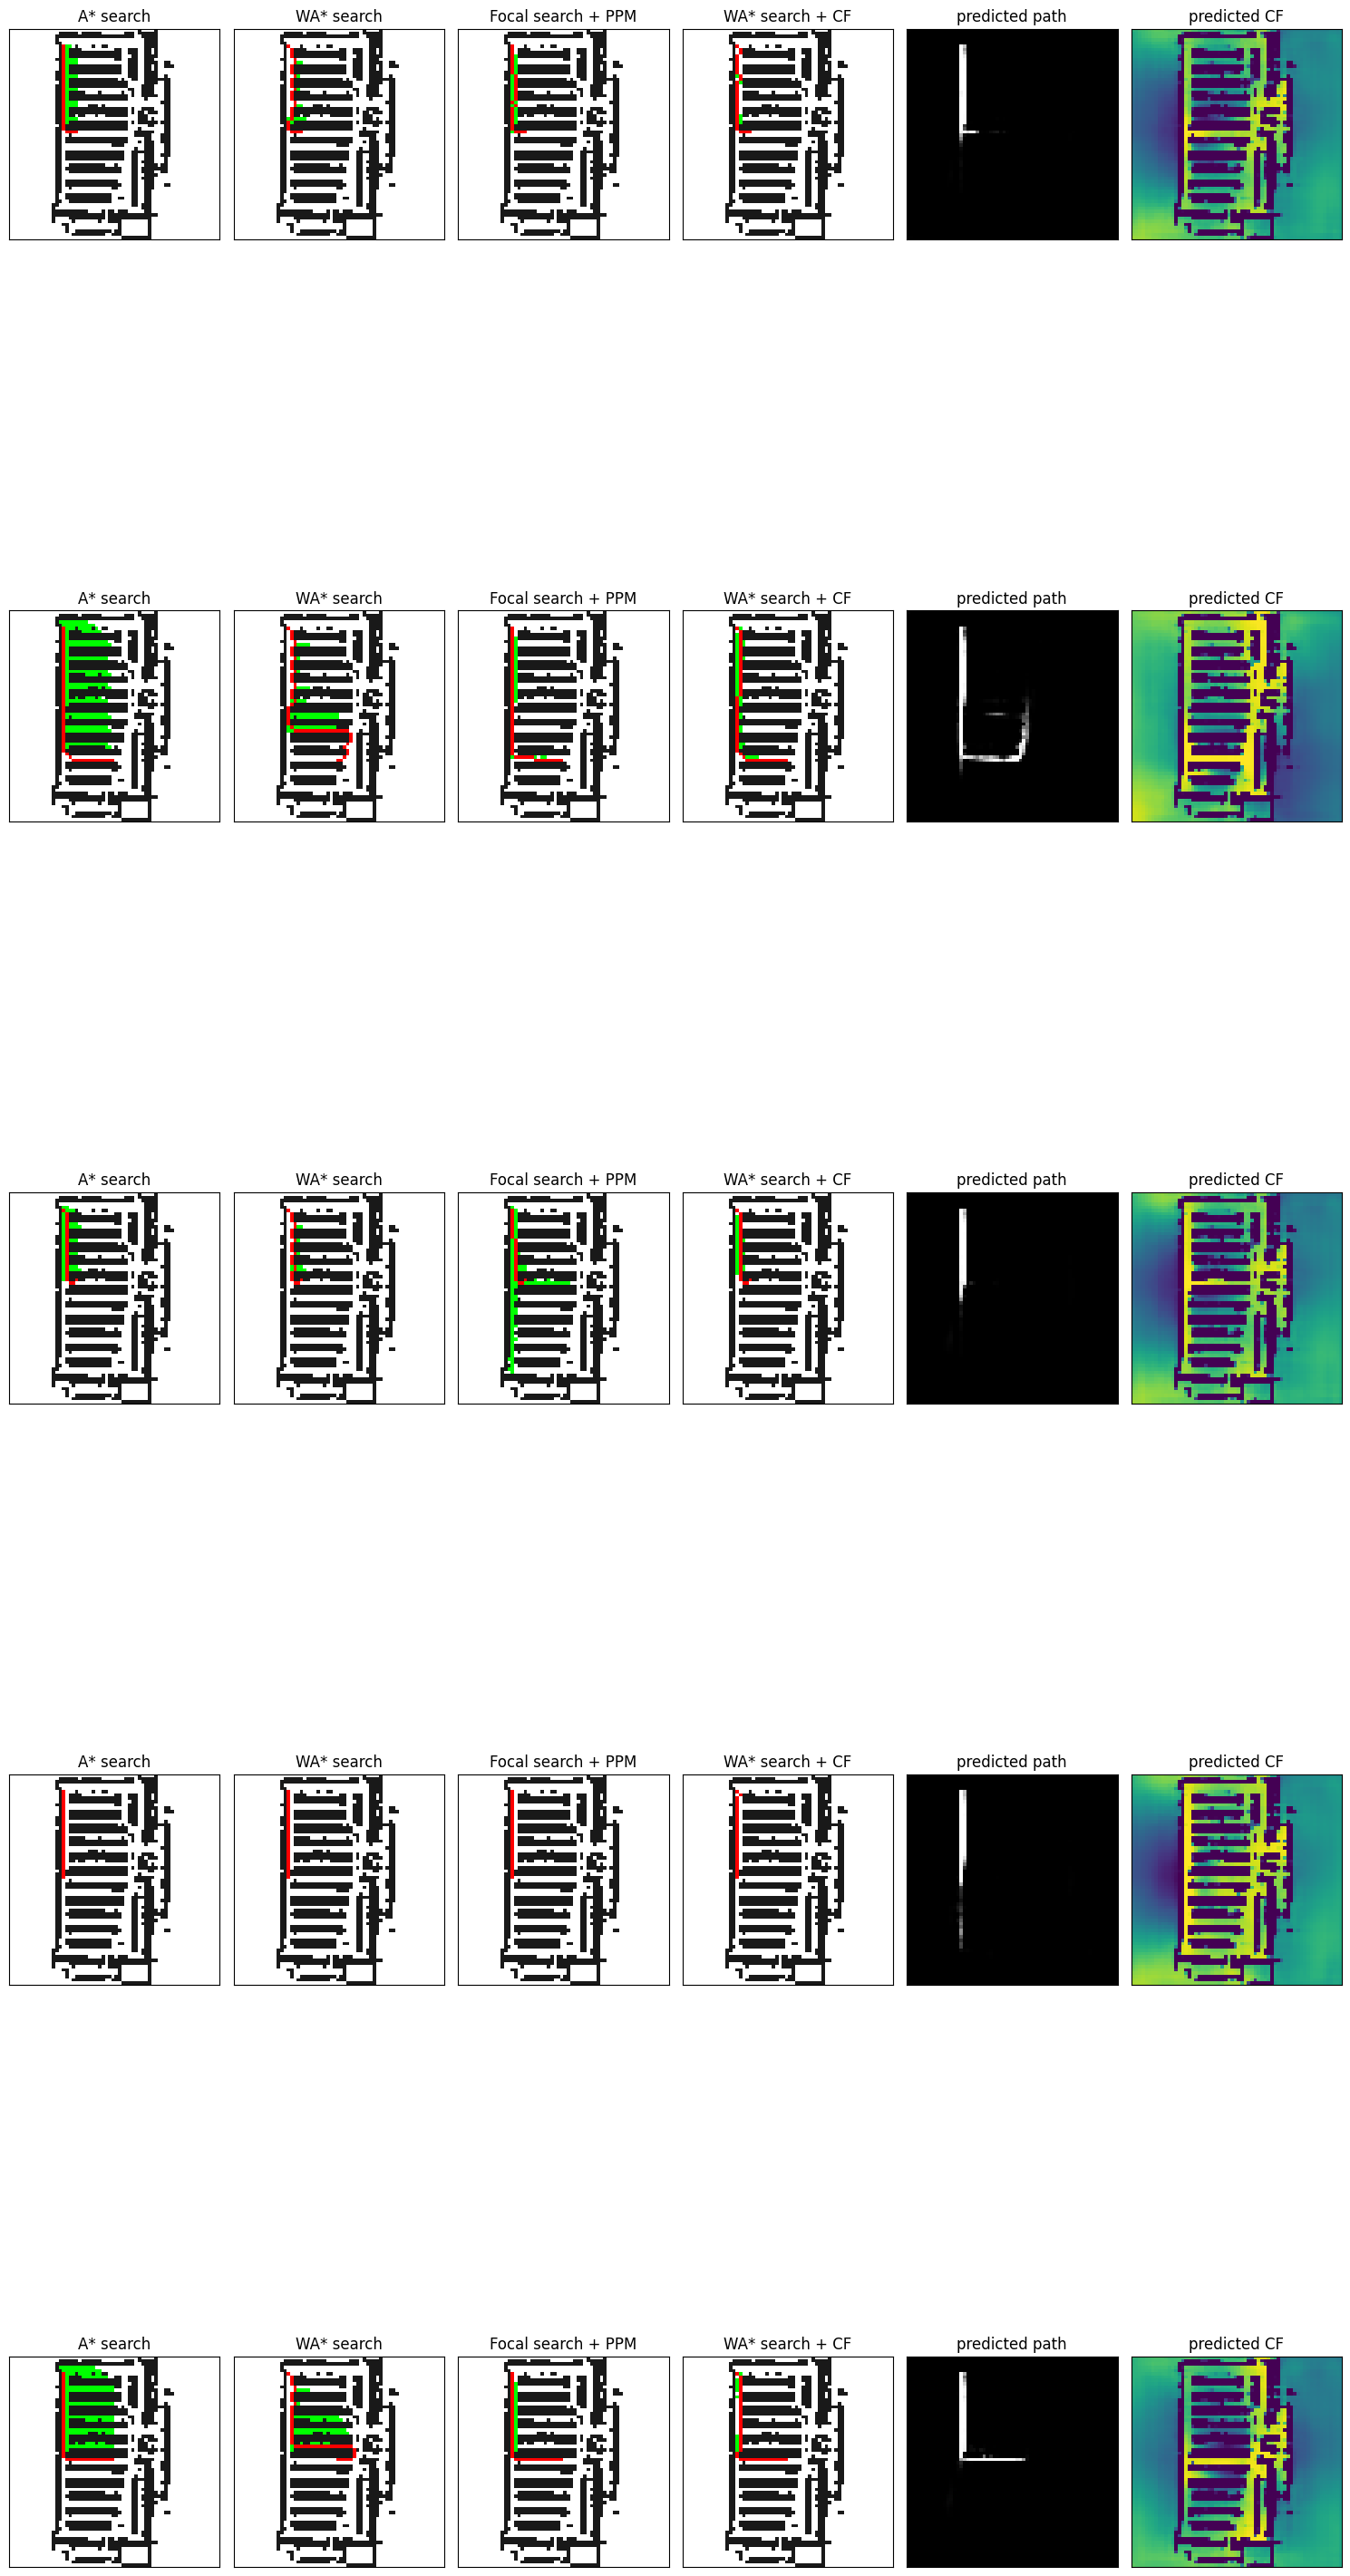

In [21]:
## Plot Results for multiple starts/goals

# create resized image from map
image_path = '0311_map.png'
target_size_x = 64
target_size_y = 64
map_gen.resize_and_pad(
    image_path = image_path, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

# create start image
start_filename = 'start_map'
start_point_x = 16
start_point_y = 5
map_gen.create_start_or_goal_image(
    x_point = start_point_x, 
    y_point = start_point_y, 
    filename = start_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

# create goal image
goal_filename = 'goal_map'
goal_point_x = 20
goal_point_y = 31
map_gen.create_start_or_goal_image(
    x_point = goal_point_x, 
    y_point = goal_point_y, 
    filename = goal_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

results_goal1 = inf.infer_path()

# create goal image
goal_filename = 'goal_map'
goal_point_x = 31
goal_point_y = 45
map_gen.create_start_or_goal_image(
    x_point = goal_point_x, 
    y_point = goal_point_y, 
    filename = goal_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)
results_goal2 = inf.infer_path()

# create goal image
goal_filename = 'goal_map'
goal_point_x = 20
goal_point_y = 26
map_gen.create_start_or_goal_image(
    x_point = goal_point_x, 
    y_point = goal_point_y, 
    filename = goal_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)
results_goal3 = inf.infer_path()

# create goal image
goal_filename = 'goal_map'
goal_point_x = 16
goal_point_y = 31
map_gen.create_start_or_goal_image(
    x_point = goal_point_x, 
    y_point = goal_point_y, 
    filename = goal_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)
results_goal4 = inf.infer_path()

# create goal image
goal_filename = 'goal_map'
goal_point_x = 31
goal_point_y = 31
map_gen.create_start_or_goal_image(
    x_point = goal_point_x, 
    y_point = goal_point_y, 
    filename = goal_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)
results_goal5 = inf.infer_path()

plot_multiple_results(results_list = [results_goal1, results_goal2, results_goal3, results_goal4, results_goal5])